# Clustering
## dataset
sklearnに存在するアヤメの分類データセットを使用。\
クラスタリング結果はt-SNEで二次元化して表示。

In [40]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

bunch = load_iris()
X = bunch['data']
Y = bunch['target']

sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)

## Ground Truth

In [35]:
from matplotlib import pyplot
import numpy as np

# x: data(2D)
# y: labels
def plot_clusters(x, y):
    for i in np.unique(y):
        x_rows = np.where(y == i)
        pyplot.scatter(x[x_rows, 0], x[x_rows, 1])
    pyplot.show()

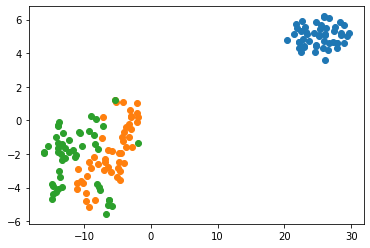

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto' , random_state=0)
x = tsne.fit_transform(X)

plot_clusters(x, Y)

## k-means

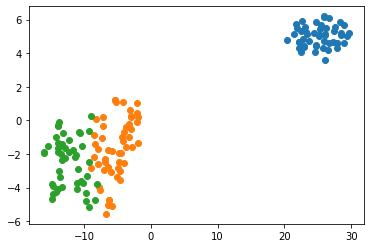

In [111]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
rows0 = np.where(y_pred == 0)
rows1 = np.where(y_pred == 1)
rows2 = np.where(y_pred == 2)
y_pred[rows0] = 1
y_pred[rows1] = 0
y_pred[rows2] = 2

plot_clusters(x, y_pred) 

## Spectral Clustering

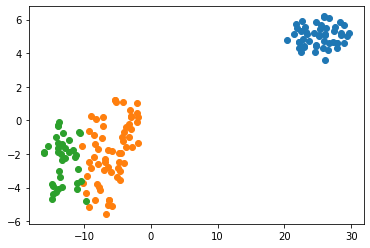

In [112]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=3, random_state=0)
y_pred = spec.fit_predict(X)
rows0 = np.where(y_pred == 0)
rows2 = np.where(y_pred == 2)
y_pred[rows0] = 2
y_pred[rows2] = 0

plot_clusters(x, y_pred)